In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read and standarize the dataset
df = pd.read_csv('data/selected_data.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
df = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns.values)
df['target'] = y

# Divide dataframe depending on target
df_correct = df.loc[df['target'] == 1]
X_correct = df_correct.iloc[:,:-1].reset_index(drop=True)
y_correct = df_correct.iloc[:,-1].reset_index(drop=True)

df_incorrect = df.loc[df['target'] == 0]
X_incorrect = df_incorrect.iloc[:,:-1].reset_index(drop=True)
y_incorrect = df_incorrect.iloc[:,-1].reset_index(drop=True)

# Print each target shape
print('Target 1 shape: ' + str(df_correct.shape))
print('Target 0 shape: ' + str(df_incorrect.shape))

Target 1 shape: (5055, 39)
Target 0 shape: (4959, 39)


# Hotelling T2

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95).fit(X_correct)

In [10]:
pca.transform(X_incorrect)

array([[-2.13662518,  3.94999149, -0.50473506, ..., -0.3792072 ,
        -0.81353357, -0.15990551],
       [-1.4098848 ,  2.79523676, -1.26659502, ...,  0.07607784,
        -0.30334081,  0.28243291],
       [ 0.87248057,  1.82859724, -0.57051832, ...,  0.35496944,
         0.31719298,  0.18695607],
       ...,
       [ 2.24717115, -3.27778642, -1.48933218, ..., -0.20526191,
        -0.10175516, -0.30530651],
       [ 3.03738643, -3.74891559, -3.4191518 , ..., -0.52477756,
        -0.17655748, -1.16630285],
       [ 0.9603708 , -1.60159801,  0.40839441, ...,  0.1470431 ,
         0.06021377, -0.37712377]])

In [1]:
from models.hotelling.t2 import hotelling_tsquared



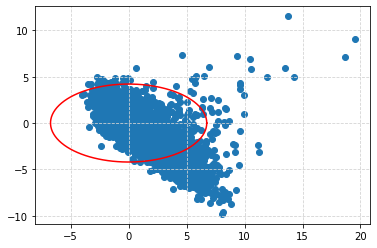

In [18]:
import matplotlib.pyplot as plt
import scipy, random

dataProject = pca.transform(X_incorrect)

#Calculate ellipse bounds and plot with scores
theta = np.concatenate((np.linspace(-np.pi, np.pi, 50), np.linspace(np.pi, -np.pi, 50)))
circle = np.array((np.cos(theta), np.sin(theta)))
sigma = np.cov(np.array((dataProject[:, 0], dataProject[:, 1])))
ed = np.sqrt(scipy.stats.chi2.ppf(0.95, 2))
ell = np.transpose(circle).dot(np.linalg.cholesky(sigma) * ed)
a, b = np.max(ell[: ,0]), np.max(ell[: ,1]) #95% ellipse bounds
t = np.linspace(0, 2 * np.pi, 100)

plt.scatter(dataProject[:, 0], dataProject[:, 1])
plt.plot(a * np.cos(t), b * np.sin(t), color = 'red')
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()